### Метод Ньютона

In [40]:
# простая реализация Метода Ньютона
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math as m

def newton(func, dfunc, x, tol = 1e-12):
    sol = 0
    p = lambda x: func(x)/dfunc(x)
    iteration = 0
    m = 1
    dxs = []
    xs = np.zeros(3)
    for i in range(30):
        iteration += 1
        
        if (dfunc(x) == 0): #Если производная 0, то сдвигаем на порешность
            k = 1
            while(abs(np.log(func(x)) - np.log(func(x + tol*(10**k)))) - tol < 0):
                k = k + 1
            dx = -p(x + (10**(k+1))*tol)
        else:# для кратных корней, умножаем на коэфф m
            if (iteration >3):
                m = max(1, (xs[2]-xs[1])/(p(xs[2])-p(xs[1])))
            dx = -int(m)*func(x)/dfunc(x)
        
        dxs.append(abs(dx))
        x = x + dx
        xs[0] = xs[1] #для избежания биения
        xs[1] = xs[2]
        xs[2] = x #делаем щаг из xs[2] 
        
        if ( x == xs[0]):# для биения
            x = x + dx
        
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
        
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration]

Формула m для нахождения порядка корня. 
Рассмотрим ф-ию $f=(x-a)^n$, тогда $$df=n(x-a)^{(n-1)}$$,
получаем $$n=(x-a) \dfrac{df}{f}$$. Применим это для $x_n$ и $x_{n-1}$

#### Нелинейное уравнение 1

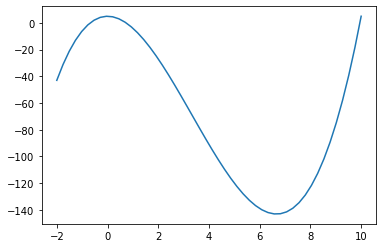

In [2]:
x = np.linspace(-2,10)
func0 = lambda x: x**3 - 10*x**2 + 5
dfunc0 = lambda x: 3*x**2 - 20*x
y = func0(x)
plt.plot(x, y)

1. Объяснить, почему различаются результаты в случае 1 и 2
2. Объяснить, что происходит в случае 3
3. Построить график порядка сходимости от номера итерации. Объяснить результат

## Решение 1ого пункта

Если рассмотреть графический метод Ньютона,то точка находится пересечением $y=0$ и касательной функции.В обоих случаях метод возрастает, но в первом случае корень правее $x_{0}$ один, а во втором их два. 

## Решение 2ого пункта

В началной точке производная равна нулю, что нарушает условие сходимости метода и вызывает ошибку


In [41]:
data1 = newton(func0, dfunc0, 8) # случай 1
data2 = newton(func0, dfunc0, 0.7) # случай 2
data3 = newton(func0, dfunc0, 0.0) # случай 3
print('sol = ', data1[0])
print('iter = ', data1[1])
print('---------------------')
print('sol = ', data2[0])
print('iter = ', data2[1])
print('---------------------')
print('sol = ', data3[0])
print('iter = ', data3[1])

sol =  9.949491057914388
iter =  7
---------------------
sol =  0.7346035077893033
iter =  4
---------------------
sol =  9.949491057914388
iter =  15


## Решение 3ого пункта

Из уравнения $|x^* - x_{n+1}| \le \alpha |x^* - x_n|^\beta$ надо выделить $\beta$, логорифмируя и помня, что $$x^* = x_0 + \sum^{l-1}_{i=0}\Delta x _i$$  $$x_k = x_0 + \sum^{k-1}_{i=0}\Delta x _i$$
получаем:  $$\beta = \frac{\ln\left({\sum^{l-1}_{i=n+1}\Delta x _i}\right) - \ln\left({\sum^{l-1}_{i=n}\Delta x _i}\right)}{\ln\left({\sum^{l-1}_{i=n}\Delta x _i}\right) - \ln\left({\sum^{l-1}_{i=n-1}\Delta x _i}\right)} $$

In [4]:
def bethas(func, dfunc, x):
    dxs = newton(func, dfunc, x)[2]
    length = len(dxs)
    bethas = []
    for n in range(1, length - 1):
        bethas.append( ( np.log(sum(dxs[n+1:])) - np.log(sum(dxs[n:])) )/( np.log(sum(dxs[n:])) - np.log(sum(dxs[n-1:])) ) )
    indexes = range(3, length + 1)
    return bethas, indexes

Text(0.5, 1.0, '$x_0 = 8$')

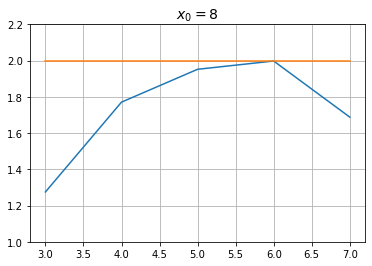

In [26]:
betha1, indexes1 = bethas(func0, dfunc0, 8)

plt.plot(indexes1, betha1)
plt.plot(indexes1, [2]*len(indexes1))
plt.ylim(1, 2.2)
plt.grid() 
plt.title('$x_0 = 8$', fontsize=14)


Text(0.5, 1.0, '$x_0 = 7$')

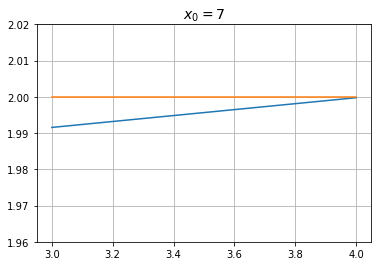

In [6]:
betha2, indexes2 = bethas(func0, dfunc0, 0.7)

plt.plot(indexes2, betha2)
plt.plot(indexes2, [2]*len(indexes2))
plt.ylim(1.96, 2.02)
plt.grid() 
plt.title('$x_0 = 7$', fontsize=14)

Text(0.5, 1.0, '$x_0 = 0$')

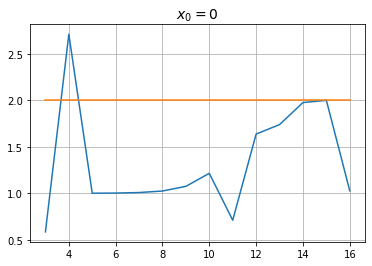

In [7]:
betha3, indexes3 = bethas(func0, dfunc0, 0.0)

plt.plot(indexes3, betha3)
plt.plot(indexes3, [2]*len(indexes3))
plt.grid() 
plt.title('$x_0 = 0$', fontsize=14)

В 1ом и 2ом слуаях порядок сходимости не превосходит 2.
В 3ем случае тоже 2, кроме одной точки

#### Нелинейное уравнение 2

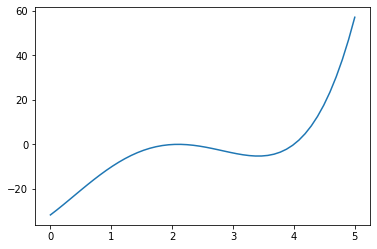

In [8]:
x = np.linspace(0,5)
func1 = lambda x: x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752 #double root
dfunc1 = lambda x: 4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538
y = func1(x)
plt.plot(x, y)

1. Построить график порядка сходимости от номера итерации. Объяснить результат

sol =  2.099999999033778
iter =  5


c:\users\max\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, '$x_0 = 2$')

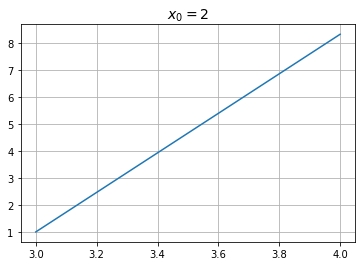

In [9]:
data = simple_newton(func1, dfunc1, 2)
print('sol = ', data[0])
print('iter = ', data[1])

bethaz, indexes = bethas(func1, dfunc1, 2)
plt.plot(indexes, bethaz)
#plt.ylim(1, 2.6)
plt.grid() 
plt.title('$x_0 = 2$', fontsize=14)

Т.к сходимость в моем случаее линейна, то и мой newton сходится за меньшее итераций

#### Нелинейное уравнение 3

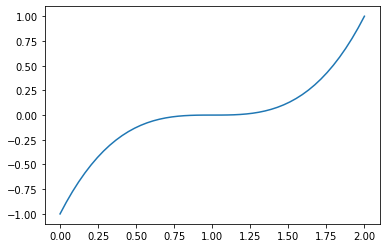

In [19]:
x = np.linspace(0,2)
func2 = lambda x: (x-1)**3
dfunc2 = lambda x: 3*(x-1)**2
y = func2(x)
plt.plot(x, y)

1. Подобрать начальное приближение и решить задачу

In [61]:
data = newton(func2, dfunc2, 6)
print('sol = ', data[0])
print('iter = ', data[1])

for i in range(-10, 15):
    result = newton(func2, dfunc2, i )
    print('x0 =', i , end='   ')
    print('sol =', result[0])
    print('iter =', result[1])

sol =  0.9999999999999999
iter =  5
x0 = -10   sol = 1.0
iter = 5
x0 = -9   sol = 1.0000000000000002
iter = 5
x0 = -8   sol = 1.0000000000000002
iter = 5
More then 30 iterations!
x0 = -7   sol = nan
iter = 30
More then 30 iterations!
x0 = -6   sol = nan
iter = 30
x0 = -5   sol = 1.0
iter = 6
x0 = -4   sol = 1.0000000000000002
iter = 5
x0 = -3   sol = 1.0
iter = 5
More then 30 iterations!
x0 = -2   sol = nan
iter = 30
More then 30 iterations!
x0 = -1   sol = nan
iter = 30
More then 30 iterations!
x0 = 0   sol = nan
iter = 30
More then 30 iterations!
x0 = 1   sol = nan
iter = 30
More then 30 iterations!
x0 = 2   sol = nan
iter = 30
More then 30 iterations!
x0 = 3   sol = nan
iter = 30
More then 30 iterations!
x0 = 4   sol = nan
iter = 30
More then 30 iterations!
x0 = 5   sol = nan
iter = 30
x0 = 6   sol = 0.9999999999999999
iter = 5
More then 30 iterations!
x0 = 7   sol = nan
iter = 30
More then 30 iterations!
x0 = 8   sol = nan
iter = 30
More then 30 iterations!
x0 = 9   sol = nan
iter 

c:\users\max\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
c:\users\max\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


#### Нелинейное уравнение 4

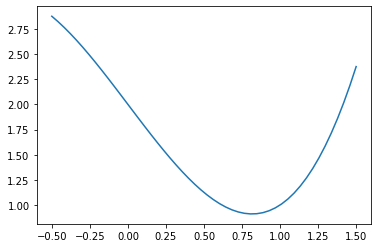

In [65]:
x = np.linspace(-0.5,1.5)
#x = np.linspace(-5,5)
func3 = lambda x: x**3 - 2*x + 2
dfunc3 = lambda x: 3*x**2 - 2
y = func3(x)
plt.plot(x, y)

1. Почему не находится решение во втором случае?

In [71]:
data1 = newton(func3, dfunc3, 0.5) # случай 1
data2 = newton(func3, dfunc3, 0) # случай 2
print('sol = ', data1[0])
print('iter = ', data1[1])
#print(data2[2])
print('--------------------------------')
print('sol = ', data2[0])
print('iter = ', data2[1])

sol =  -1.7692923542386314
iter =  10
[1.0, 1.0, 3.0, 25.82608695652174, 21.769116598062816, 1.8954721658280904, 0.5868834204158029, 3.535412164817924, 1.2788781463488197, 8.059213398789128, 2.9249296559710976, 3.8291379884829686, 0.6736040758579082, 0.3059550197481985, 0.05681265140119353, 0.0023625950859257104, 4.012085936081837e-06, 1.155960731369025e-11, 0.0]
--------------------------------
sol =  -1.7692923542386314
iter =  19


Решение не находится из-за биений